<center><h1>Computer lab 2: Regression and Least Squares</h1></center>
<center><h2>Part 1: Fitting polynomials to data</h2></center>

_SMHI (Swedish Meteorological and Hydrological Institute) provides a generous dataset containing the evolution of the daily temperature in Uppsala. The dataset contains measurements ranging from the beginning of the meteorological observations in 1722 all the way until 2020. In this part of the lab, we will fit polynomials to this data using so called Least Squares fitting._ <br>
<hr>

<p>First, import the <b>NumPy</b> and <b>matplotlib</b> libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h3>Load the dataset</h3>

<p>In this lab you will work with a subset of a real data set. The complete dataset, which you won't need here, can be found here: <a href="https://www.smhi.se/data/meteorologi/temperatur/uppsalas-temperaturserie-1.2855" target="_blank">https://www.smhi.se/data/meteorologi/temperatur/uppsalas-temperaturserie-1.2855</a>. The data set contains the daily temperatures in Uppsala between 1722-2020. To make it a little simpler, we will work with a smaller subset of the data, containing the average annual temperatures over the last 60 years, i.e. data covering the period 1960-2020. This data has been prepared for you in a txt-file called <b>tempAverage1960_2020.txt</b>. </p>
<p>
Begin by loading the dataset using <b>NumPy</b>. It is easier if the txt-file is located in the same folder as this notebook.<br>
If you for example load a txt file into an array called <b>example_array</b> using the <b>numpy</b> command<br>
<code>example_array = np.loadtxt('example_filename.txt', usecols=(0,1))</code>, <br>
where the last argument specifies which columns you would like to include. In this example, we'd like to include the first and second columns indexed 0 and 1, respectively.</p>
<p>
<b>If you work in Google Colab</b><br>
To be able to import the data file, you must first mount the drive on Colab. That way you can access your Google drive from Google Colab. Run the cell below to mount your drive. When you are asked to connect to Google Drive, just click on <code>Connect to Google Drive</code>. You must also allow your Google Drive to acces your Google account.
</p>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

<p>
Now, load the txt file <b>tempAverage1960_2020.txt</b> and store it in an appropriate variable name. If you work in Google Colab you must have the full search path in the <code>loadtxt</code> command. It might for example look like this<br>
<code>'/content/drive/My Drive/Colab Notebooks/tempAverage1960_2020.txt'</code> (in this case the data file must be located directly under the <code>Colab Notebooks</code>-folder).
</p>

In [ ]:
# Enter your code to load the data-file here
uppsala_temp = np.loadtxt("tempAverage1960_2020.txt", usecols=(0, 1))

<h4>Inspect the data</h4>
<p>Inspect the data by printing the arrays. You can, for example, look at the data in the first column using the command <code>print(example_array[:, 0])</code>.</p>

In [ ]:
# enter your code here
print(uppsala_temp[:, 0])

[1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971.
 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983.
 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995.
 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007.
 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019.
 2020.]


<p>Check the shape of the array (remember <code>example_array.shape</code> or <code>np.shape(example_array)</code> gives you the shape of the array). How many datapoints does your dataset contain? Are there as many temperature measurements as years included in the first column?</p>

In [4]:
# enter your code here
print(uppsala_temp.shape)

(61, 2)


<p>To make it simpler to work with, store the years (the first column) in one variable (1D-vector) <b>years</b>, and the temperatures (2nd column) in another variable (also a 1D-vector) <b>temp</b>.
    </p>

In [5]:
# Enter your code here
years = uppsala_temp[:, 0]
temp = uppsala_temp[:, 1]

<p>
Plot the temperature as a function of years. Use a point marker, for example a star (<code>"*"</code>). Don't forget to add axis labels and a title to your plot. Do you see any potential trends in the data?</p>

Text(0, 0.5, 'Temperature [C]')

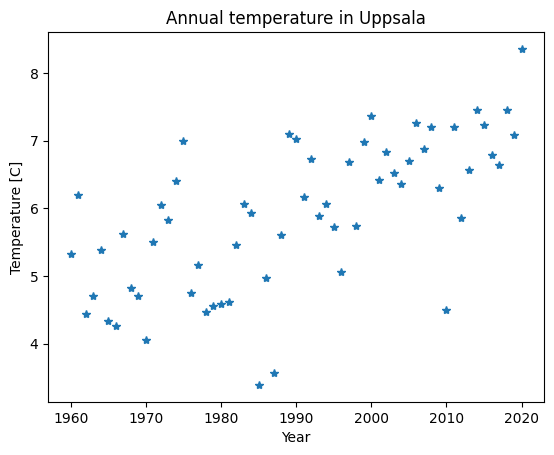

In [ ]:
plt.figure(1)  # This will open a figure 1. Keep this
# Enter your code here
plt.plot(years, temp, "*")
plt.title("Annual temperature in Uppsala")
plt.xlabel("Year")
plt.ylabel("Temperature [C]")

<br>
<hr>
<h3>Curve Fitting</h3>

<p>
To investigate the trends in the data, we will use the <b>numpy.polynomial</b> package to fit polynomials of different degrees to our data. This is done using the method of least squares, which finds the polynomial of the specified degree that minimizes the the difference between the polynomial and the data (or to be precise, it minimizes the sum of the squares of the differences). We start with importing the package.
    </p>

In [7]:
from numpy.polynomial import Polynomial

<p>
Fit a linear polynomial (1st degree polynomial) to the data, and print the coefficients.
</p>    
<p>
Hint: If you have some observations $y$ given $x$, you can fit a first degree polynomial to this data using the command<br>
<code>p = Polynomial.fit(x, y, deg=1, window=[a,b])</code>.<br>
The second argument specifies the degree of the polynomial you wish to fit to the data, and the last argument specifies the domain (in this case [1960, 2020]) The best fit polynomial of the specified degree is then stored by its coefficients in the polynomial object, here <code>p</code>. Print the polynomial object (use <code>print</code>) to inspect the coefficients.
    </p>

In [16]:
# Enter your code here
p = Polynomial.fit(years, temp, deg=1, window=[1960, 2020])
print(p)

-75.15672441 + 0.04073172 x


<p>Plot the best fit together with the original data, with the original data plotted as a scatter plot (for example using <code>"*"</code>). Begin with only the data as a scatter plot. Remember, you use the plot-command as before, but you choose another marker, for example according to <code>plt.plot(x, y, '*')</code>.  

Text(0, 0.5, 'Temperature [C]')

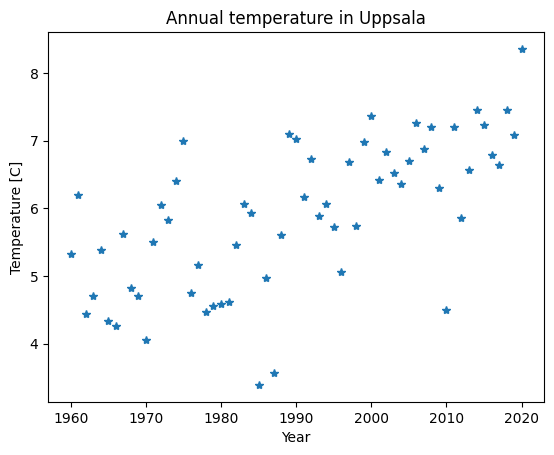

In [ ]:
plt.figure(2)
# Enter your code here
plt.plot(years, temp, "*")
plt.title("Annual temperature in Uppsala")
plt.xlabel("Year")
plt.ylabel("Temperature [C]")

<p>Now add the best fit in the same plot as the data. The problem is, however, that we first need to "translate" the polynomial to a line that we can plot. Do that by evaluating the polynomial $p$ in a certain number of x-values from 1960 to 2020. Do the following steps

*  Decide number of points $N$ for the $x$-values, for example <code>N=200</code>
*  Create the x-values (the x-axis), from 1960 to 2020 in $N$ points. Use <code>np.linspace</code> here
*  Evaluate the polynomial $p$ in these $x$-values, <code>y = p(x)</code>
*  Plot $x$ and $y$ using a line-marker, in the same plot as the data

<p>
You can copy and paste from the previous cell (the scatter plot), and add the code for plotting the polynomial. It's important that you use <code>plt.legend</code> to distinguish between the data and the polynomial. A little tip is to use labels in the plot-command, such as <code>plt.plot(x,y,label='1st degree fit')</code> and corresponding label for the data. If labels are defined, the legend is created with <code>plt.legend()</code>.</p>

Text(0, 0.5, 'Temperature [C]')

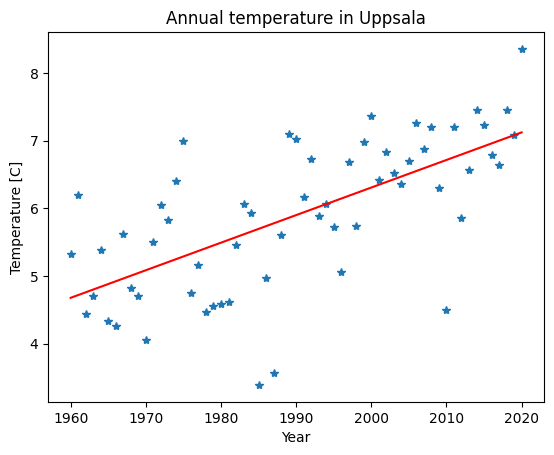

In [ ]:
# First enter you code for translating poynomial to a line here
x_smooth = np.linspace(1960, 2020, num=200)
y = p(x_smooth)
plt.figure(2)
# Enter your plotting code here
plt.plot(years, temp, "*")
plt.plot(x_smooth, y, "r-")
plt.title("Annual temperature in Uppsala")
plt.xlabel("Year")
plt.ylabel("Temperature [C]")

<p>If everything is done correctly, you should have a plot with data as stars and the best-fit polynomial as a line. <br>
Does a first degree polynomial fit manage to capture the trends in the data?</p>

<br>
<hr>
<p>
Now, fit a 2nd degree (quadratic) and 3rd degree (cubic) polynomial to the data. Print the polynomials you get and plot them in separate figures (use <code>figure</code> to open a new figure window for the 3rd degree polynomial) together with the original data. <br>
Do these fits capture the trends in the data? Which fit would you choose?</p>

Text(0, 0.5, 'Temperature [C]')

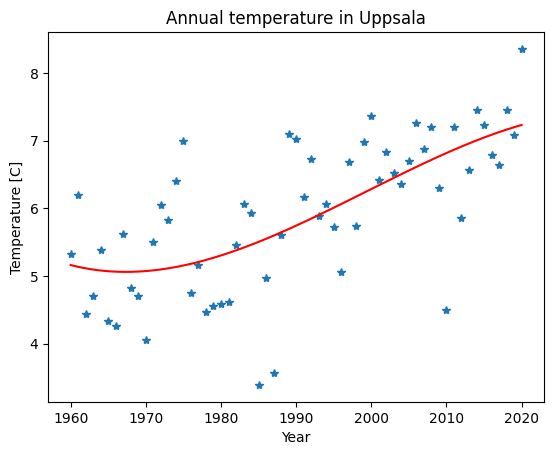

In [20]:
# Enter your code here
p = Polynomial.fit(years, temp, deg=3, window=[1960, 2020])

x_smooth = np.linspace(1960, 2020, num=200)
y = p(x_smooth)

plt.figure(3)
plt.plot(years, temp, "*")
plt.plot(x_smooth, y, "r-")
plt.title("Annual temperature in Uppsala")
plt.xlabel("Year")
plt.ylabel("Temperature [C]")

<p>
Fit a 28th degree polynomial to the data and plot the results. What do you observe? Does it express the trend in the data in a good way.
    </p>

C:\Programming\Python\Python3.13.5\Lib\site-packages\numpy\polynomial\polynomial.py:1436: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


Text(0, 0.5, 'Temperature [C]')

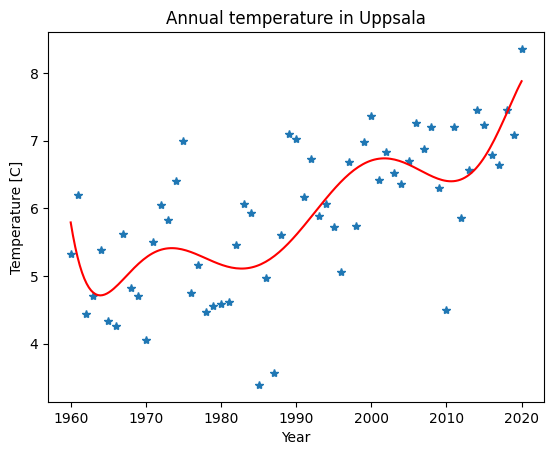

In [21]:
# Enter your code here
p = Polynomial.fit(years, temp, deg=28, window=[1960, 2020])

x_smooth = np.linspace(1960, 2020, num=200)
y = p(x_smooth)

plt.figure(3)
plt.plot(years, temp, "*")
plt.plot(x_smooth, y, "r-")
plt.title("Annual temperature in Uppsala")
plt.xlabel("Year")
plt.ylabel("Temperature [C]")

<i>High polynomial degrees are avoided for different reasons, e.g. the often lead to oscillations between the data points. Also, they don't really express the trend in the data. You might also get warning about 'poorly conditioned' problem, which might lead to serious loss of accuracy. We will explain 'condition' in the part 2 of this lab.</i></p>   
<p><b>If you would like to save a plot</b> for later use, for example in a report, use the command <code>plt.savefig('filename.png')</code>, with an appropriate filename, after the plot commands.
    </p>

<h3>Global Warming Analysis</h3>

<p>
It is known that the temperature of the Earth has risen in recent years. Is it possible to see that trend also in Uppsala? To investigate this, we will look at a larger part of the available temperature observations, dating back to year 1800. You have access to the average annual temepratures in the txt-file <b>tempAverage1800_2020.txt</b>. The data before the 19th century is not as reliable as more recent data, so we focus on the 19th century and onwards in our analysis.
    </p>

<p>Load the txt-file (following the same procedure as before, although it should not be necessary to mount the drive) and plot the temperature as a function of time. Can you see an increase in temperature in recent years? Are signs of the global warming visible in the data? Do a least squares fitting and investigate a couple of polynomial degrees. Which one do you think is the best for showing the trend in the data?</p>

In [ ]:
# Enter your code here
uppsala_temp = np.loadtxt("tempAverage1800_2020.txt")
years = uppsala_temp[:, 0]
temp = uppsala_temp[:, 1]

In [36]:
# 1st degree polynomial
p_fit1 = Polynomial.fit(years, temp, deg=1, window=[1800, 2020])
x1 = np.linspace(1800, 2020, num=200)
y1 = p_fit1(x1)
# 2nd degree
p_fit2 = Polynomial.fit(years, temp, deg=2, window=[1800, 2020])
x2 = np.linspace(1800, 2020, num=200)
y2 = p_fit2(x2)

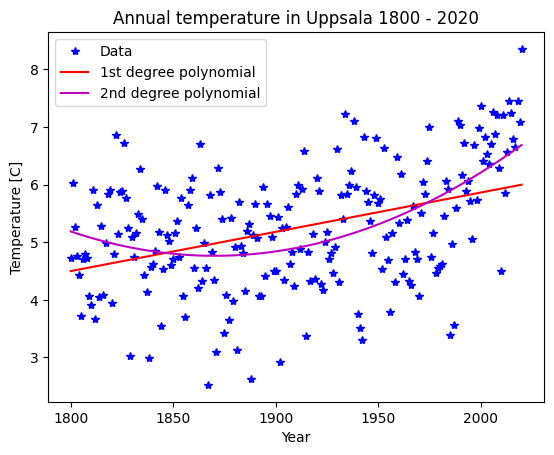

In [38]:
# Plot
plt.figure(4)
plt.plot(years, temp, "b*", label="Data")
plt.plot(x1, y1, "r-", label="1st degree polynomial")
plt.plot(x2, y2, "m-", label="2nd degree polynomial")
plt.title("Annual temperature in Uppsala 1800 - 2020")
plt.xlabel("Year")
plt.ylabel("Temperature [C]")
plt.legend()

<h3>If you have time</h3>

<p>
When the data is oscillating a lot, it is sometimes interesting to look at the moving average to see trends more clearly. To do this, we create a new dataset in which each datapoint contains the average temperature over the last, say, 10 years. This is why it is called a <i>moving average</i>, the average moves with the data.</p>

<p>Use the function <b>moving_average(A, N)</b> defined below to calculate the moving average of the temperature data, and plot the resulting time series in a plot together with the original data. Read the help-text in the function to understand how to use it. It is the $y$-values, here the temperature values, that we perform the moving average on. Start with a rolling window of size $N=10$ years and then try different window sizes $N$. You call the function according to <code>moving_average_temp=moving_average(temp_data,N)</code>, where <code>temp_data</code> is your temperature vector.</p>
<p>Note, you have to run the cell with the function, before you can use the function in you own code.</p>

In [ ]:
def moving_average(A, N):
    """A function that calculates the moving average of an array A, based on a rolling window of size N.
    The function returns the resulting array B containing the moving average.
    The first N-1 elements of B contains the moving average based on the assumption that the previous 10
    elements in A had a value identical to the first element of the array, to make sure that the resulting
    array B is of the same size as the array A."""
    A_tmp = np.ones(N - 1)
    A_tmp[0 : N - 1] = A[0]
    A_ = np.concatenate((A_tmp, A), axis=0)
    B = np.cumsum(A_, dtype=float)
    B[N:] = B[N:] - B[:-N]
    return B[N - 1 :] / N

In [ ]:
# Enter your code here

<p>Does the moving average help to visualize the trends in the data? As you hopefully can see it smooths the oscillations out, and it makes it easier to actually see the trends.</p>
<p>&nbsp;</p>
<hr>